# Visualizing fire scars through false color

**Author:** Megan Hessel 

**GitHub repo:** https://github.com/eds-222-stats-f25/conducting-inference-meganhessel.git 

### About 

**Purpose**

The purpose of this note book is to use (false and true) color imagery to study the 2025 Palisades and Eaton wildfires in Los Angeles. 

**Highlights**
1) 
2) 
3) 

**About the data**

Palisades and Eaton wildfires burned in Los Angeles County in January of 2025. The Palisades and Eaton Dissolved Fire Perimeters datasets are geometry polygons of the fires' boundaries, obtained through a County of Los Angeles ArcGIS publication. 

The Landsat dataset is from Landsat 8 satellite, which records atmospherically corrected spectral reflectance data. We retrieved this  Landsat Collection 2 Level-2 data from the Microsoft Planetary Computer data catalogue. 

**References**
-  County of Los Angeles. (January 21, 2025). *Palisades and Eaton Dissolved Fire Perimeters (2025)*. AcrGIS Online. https://egis-lacounty.hub.arcgis.com/maps/ad51845ea5fb4eb483bc2a7c38b2370c/about 
-  Microsoft. (2025). *Landsat Collection 2 Level-2* [Dataset]. Microsoft Planetary Computer. https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2#overview

In [ ]:
# Importing libraries 
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import xarray as xr
import geopandas as gpd

In [ ]:
# Importing data 
fp_eaton = os.path.join('data', 'Eaton_Perimeter_20250121', 'Eaton_Perimeter_20250121.shp')
eaton = gpd.read_file(fp_eaton)

fp_pal = fp = os.path.join('data', 'Palisades_Perimeter_20250121', 'Palisades_Perimeter_20250121.shp')
pal = gpd.read_file(fp_pal)

## Data Exploration 

In [ ]:
# Dimensions, info, and crs info 
print(eaton.shape)
print(pal.shape)

print(eaton.info())
print(pal.info())

print(f"the crs for easton is {eaton.crs} and is the CRS projected? {eaton.crs.is_projected}")
print(f"the crs for palisades is {pal.crs} and is the CRS projected? {pal.crs.is_projected}")



(20, 5)
(21, 5)
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    20 non-null     int64   
 1   type        20 non-null     object  
 2   Shape__Are  20 non-null     float64 
 3   Shape__Len  20 non-null     float64 
 4   geometry    20 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 932.0+ bytes
None
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    21 non-null     int64   
 1   type        21 non-null     object  
 2   Shape__Are  21 non-null     float64 
 3   Shape__Len  21 non-null     float64 
 4   geometry    21 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 972.0+ bytes
None
the cr

<Axes: >

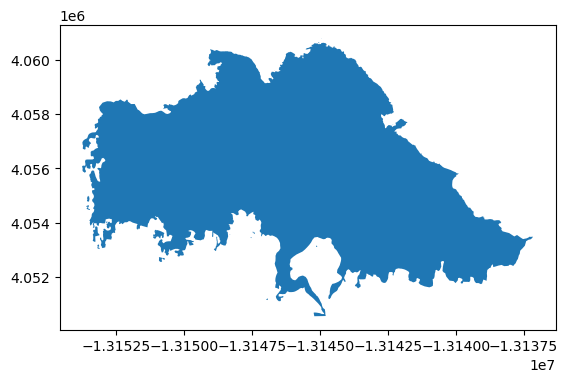

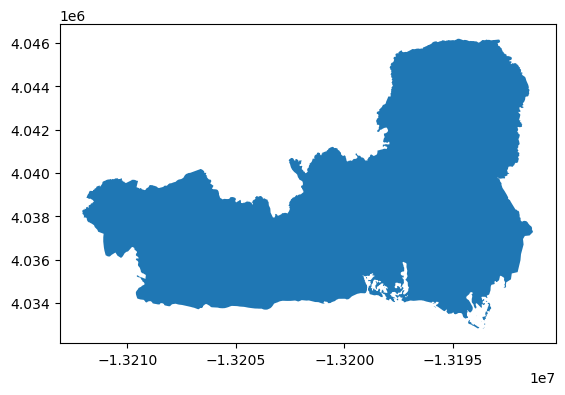

In [4]:
# Simple Plot
eaton.plot()
pal.plot()

## Breif Summary About Data 

The Palisades and Eaton dataframes both have 5 columns (object ID, type, ara, length, and geometry). Palisades has 1 more row than Eaton. Both CRSs are projected and EPSG:3857. 

## 4. Restoring Geospatial Information

In [27]:
# Import the Landsat data
landsat = xr.open_dataset('data/landsat8-2025-02-23-palisades-eaton.nc')

In [ ]:
# Preliminary Landsat info 
print(f"THE COORDINATES ARE: {landsat.coords}")
print(f"THE VARIABLES ARE: {landsat.var}")
print(f"THE DIMENSIONS ARE: {landsat.dims}")

THE COORDINATES ARE: Coordinates:
  * y        (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x        (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time     datetime64[ns] 8B ...
THE VARIABLES ARE: <bound method DatasetAggregations.var of <xarray.Dataset> Size: 78MB
Dimensions:      (y: 1418, x: 2742)
Coordinates:
  * y            (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x            (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time         datetime64[ns] 8B ...
Data variables:
    red          (y, x) float32 16MB ...
    green        (y, x) float32 16MB ...
    blue         (y, x) float32 16MB ...
    nir08        (y, x) float32 16MB ...
    swir22       (y, x) float32 16MB ...
    spatial_ref  int64 8B ...>
THE DIMENSIONS ARE: FrozenMappingWarningOnValuesAccess({'y': 1418, 'x': 2742})


### Brief Summary 

Landsat data blah blah blah 

In [ ]:
# CRS with rio.crs
print(landsat.rio.crs) # THIS IS NOT A GEOSPATIAL OBJECT 

# Further CRS investigation  
print(landsat.x.crs)
print(landsat.y.crs)


None
EPSG:32611
EPSG:32611


In [ ]:
#  Print the CRS by using accesing the spatial_ref.crs_wkt attribute 
landsat_crs = landsat.spatial_ref.crs_wkt
landsat_crs

'PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]'

In [46]:
# Recover the geospatial info 
landsat.rio.write_crs(landsat_crs, inplace = True) 

<xarray.Dataset> Size: 78MB
Dimensions:      (y: 1418, x: 2742)
Coordinates:
  * y            (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x            (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time         datetime64[ns] 8B ...
    spatial_ref  int64 8B 0
Data variables:
    red          (y, x) float32 16MB ...
    green        (y, x) float32 16MB ...
    blue         (y, x) float32 16MB ...
    nir08        (y, x) float32 16MB ...
    swir22       (y, x) float32 16MB ...

In [ ]:
# Print CRS 
print(landsat.rio.crs) # Now, it is a spatial object with a crs 

EPSG:32611


## 5. True Color Image

/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


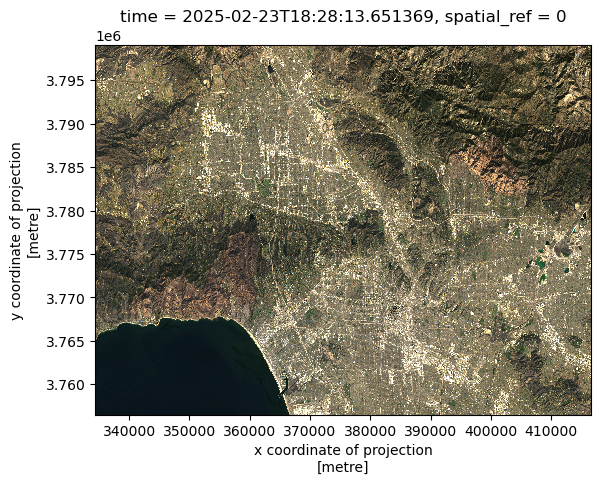

In [ ]:
# Create an RGB image with selected bands 

(landsat[['red', 'green', 'blue']] # Select the red, green, and blue variables 
    .to_array() # Convert to array 
    .plot.imshow(vmin=7000, vmax=15000)) # Create an RGB image

In [123]:
# Identifying what bands have nans 
(landsat[['red', 'green', 'blue']]
    .to_array() 
    .isnull().sum()) # Gathering all values where isnull = TRUE 

# Array(110) have a nan! 


<xarray.DataArray ()> Size: 8B
array(110)
Coordinates:
    time         datetime64[ns] 8B 2025-02-23T18:28:13.651369
    spatial_ref  int64 8B 0

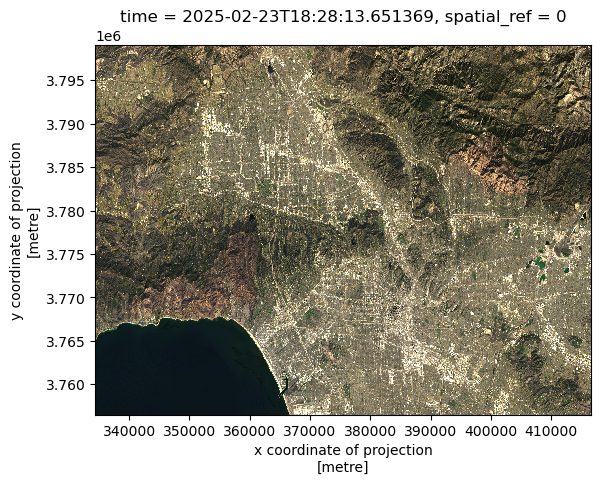

In [ ]:
# Substitute the any nan values for 0 AND Create a new true color image with NO warnings 
(landsat[['red', 'green', 'blue']]
    .to_array() 
    .fillna(0) # nan values to 0 
    .plot.imshow(vmin=7000, vmax=15000)) # Create an RGB image


### Comparing between plots 

blah blah blah blah 

## 6. False color image

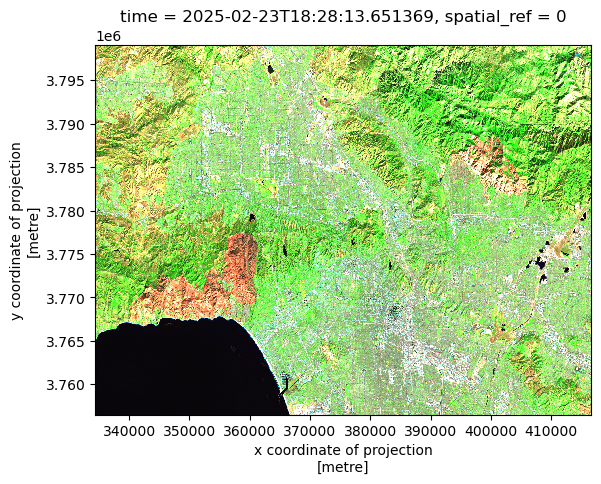

In [ ]:
# Plotting the short-wave infrared (swir22), near-infrared, and red variables 

(landsat[['swir22', 'nir08', 'red']]
    .to_array()  
    .plot.imshow(vmin=7000, vmax=15000)) # Create an RGB image

## 7. Map 

1. Create a map showing the shortwave infrared/near-infrared/red false color image together with both fire perimeters. Customize it appropriately including, at least, an informative title and legend. You may also want to include text on the map to identify which fire is which.

2. Write a figure description for the map including a brief explanation of how false color imagery is being used.

In [121]:
eaton

,OBJECTID,type,Shape__Are,Shape__Len,geometry
0,1,Heat Perimeter,2.206266e+03,270.199719,"POLYGON ((-13146936.686 4051222.067, -13146932..."
1,2,Heat Perimeter,2.071021e+04,839.204218,"POLYGON ((-13150835.463 4052713.929, -13150831..."
2,3,Heat Perimeter,3.639238e+03,250.304502,"POLYGON ((-13153094.697 4053057.596, -13153113..."
3,4,Heat Perimeter,1.464551e+03,148.106792,"POLYGON ((-13145097.740 4053118.235, -13145100..."
4,5,Heat Perimeter,4.132754e+03,247.960744,"POLYGON ((-13153131.126 4053196.882, -13153131..."
5,6,Heat Perimeter,8.345547e+02,107.859955,"POLYGON ((-13147517.359 4053437.387, -13147524..."
6,7,Heat Perimeter,2.881172e+02,70.041598,"POLYGON ((-13148298.311 4053574.481, -13148298..."
7,8,Heat Perimeter,2.879512e+03,275.409855,"POLYGON ((-13147475.154 4053666.513, -13147472..."
8,9,Heat Perimeter,8.388641e+04,1880.918469,"POLYGON ((-13151028.496 4053701.359, -13151024..."
9,10,Heat Perimeter,6.839698e+04,1518.792972,"POLYGON ((-13153173.289 4053740.672, -13153173..."
